In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

c = 299792458
h = 6.626 * 10**(-34)
e = 1.602 * 10**(-19)
laser_wavelength = 632  # in nm
raman_shifts_cm = np.array([1350, 1580, 2700])  # D band, G band, 2D band in cm⁻¹


C:\Users\kelme\AppData\Local\Temp\ipykernel_43824\1489472646.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# wavelength in nm
def lam_to_GHz(lam):
    return c/(lam*10**(-9)) * 10**(-9)
def lam_to_eV(lam):
    return c/(lam*10**(-9)) * h /e
def lam_to_wave(lam):
    return 0.01/(lam*10**(-9))

In [4]:
# a1

DiffRegions = []
Regions = ['Xray', 'UV', 'Visible', 'Near IR', 'Mid IR', 'Far IR', 'THz Radiation']
Regions_wavelength = ['0.01--10', '10--400', '400--700', '750--1400', '1400--15000', '15000--1000000', '100000--1000000']

NewRegions_wavelength = []
for interval in Regions_wavelength:
    splitter = '--'
    NewRegions_wavelength.append('--'.join((f'{float(interval.split(splitter)[0]):.1e}', f'{float(interval.split(splitter)[1]):.1e}')))
DiffRegions.append(NewRegions_wavelength)

f = [lam_to_GHz, lam_to_eV, lam_to_wave]
Units = ['nm', 'GHz', 'eV', 'cm-1']

for func in f:
    NewUnit = []
    for region in Regions_wavelength:
        splitter='--'
        a = f'{func(float(region.split(splitter)[0])):.1e}'
        b = f'{func(float(region.split(splitter)[1])):.1e}'
        NewUnit.append('--'.join((a,b)))
    DiffRegions.append(NewUnit)

Dataframe = pd.DataFrame(DiffRegions, columns=Regions, index=Units)

Dataframe

,Xray,UV,Visible,Near IR,Mid IR,Far IR,THz Radiation
nm,1.0e-02--1.0e+01,1.0e+01--4.0e+02,4.0e+02--7.0e+02,7.5e+02--1.4e+03,1.4e+03--1.5e+04,1.5e+04--1.0e+06,1.0e+05--1.0e+06
GHz,3.0e+10--3.0e+07,3.0e+07--7.5e+05,7.5e+05--4.3e+05,4.0e+05--2.1e+05,2.1e+05--2.0e+04,2.0e+04--3.0e+02,3.0e+03--3.0e+02
eV,1.2e+05--1.2e+02,1.2e+02--3.1e+00,3.1e+00--1.8e+00,1.7e+00--8.9e-01,8.9e-01--8.3e-02,8.3e-02--1.2e-03,1.2e-02--1.2e-03
cm-1,1.0e+09--1.0e+06,1.0e+06--2.5e+04,2.5e+04--1.4e+04,1.3e+04--7.1e+03,7.1e+03--6.7e+02,6.7e+02--1.0e+01,1.0e+02--1.0e+01


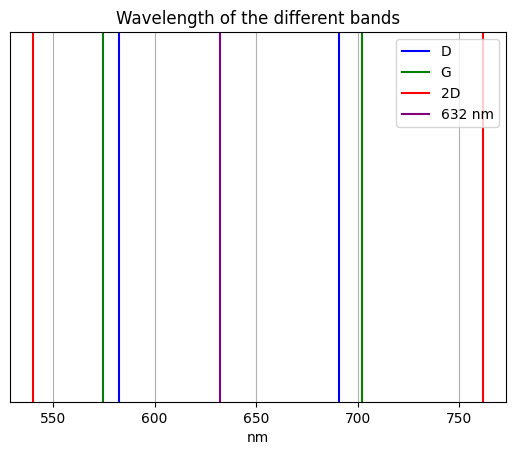

In [10]:
# a2


# Convert laser wavelength to cm (1 nm = 1e-7 cm)
laser_wavelength_cm = laser_wavelength * 1e-7

# Calculate Raman wavelengths using the formula
raman_wavelengths_nm_low = 1e7 / ((1 / laser_wavelength_cm) - (raman_shifts_cm))
raman_wavelengths_nm_high = 1e7 / ((1 / laser_wavelength_cm) + (raman_shifts_cm))


# Convert the result back to nm
D = [raman_wavelengths_nm_low[0], raman_wavelengths_nm_high[0], 'b']
G = [raman_wavelengths_nm_low[1], raman_wavelengths_nm_high[1], 'g']
twoD = [raman_wavelengths_nm_low[2], raman_wavelengths_nm_high[2], 'r']
y = np.zeros(2)
plt.axvline(D[0], color=D[2], label='D')
plt.axvline(D[1], color=D[2])

plt.axvline(G[0], color=G[2], label='G')
plt.axvline(G[1], color=G[2])

plt.axvline(twoD[0], color=twoD[2], label='2D')
plt.axvline(twoD[1], color=twoD[2])

plt.axvline(laser_wavelength, label = '632 nm', color='purple')
plt.legend()
plt.title('Wavelength of the different bands')
plt.xlabel('nm')

plt.yticks([])
plt.grid()
plt.show()

In [137]:
# a3

c_c_wavenumber = np.array([1000, 1200])
c_c_vm = c_c_wavenumber/0.01 * c /(2*np.pi)
c_m = 1.9944733 * 10**(-26) #mass of carbon atom in kg
mu = c_m/2
K = c_c_vm**2 * (2*np.pi)**2 * mu

print(f'The force constant is somewhere between {K[0]:.2f} and {K[1]:.1f} (N/m) for a c-c bond, using that the wavenumber of the vibration is 1000-1200 cm^-1')

The force constant is somewhere between 8.96 and 12.9 (N/m) for a c-c bond, using that the wavenumber of the vibration is 1000-1200 cm^-1


**b1**

(Explain why pure Graphene does not show a D band)


The D band is associated to the disorder in the structure. Pure graphene has nearly no disorder and that is why the D band does not show. 


**b2**

(Explain why the Raman spectrum of pure graphene may show a D band upon electrochemical cycling vs. lithium)

The apperance of the D band of pure graphene after electrochemical cycling versus lithium  due to introduction of disorder. 

**c1**

Looking at the capacity
$$
Capacity = \frac{nF}{m}
$$
We can see that if we only change $n$ to the double amount, we get double the capacity. The answer to the question would then be 744 $\text{mAhg}^{-1}$

**c2**

In our case, intercalation is the process of inserting ions between the weakly bonded graphene layers.